# SMS Spam classification with Naive Bayes

In [24]:
url = ""
dataset = url + "spam.csv"

## Importing Libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Loading the Dataset

In [26]:
import pandas as pd

data = pd.read_csv(dataset, encoding='latin-1')
data.head(n=10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [27]:
data.iloc[2]

v1                                                         spam
v2            Free entry in 2 a wkly comp to win FA Cup fina...
Unnamed: 2                                                  NaN
Unnamed: 3                                                  NaN
Unnamed: 4                                                  NaN
Name: 2, dtype: object

There are 2 labels:

* `ham`: E-mail that is generally desired and isn't considered spam. (https://en.wiktionary.org/wiki/ham_e-mail)
* `spam`

## Distribution spam/non-spam plots

In [28]:
# Couting `ham` and `spam`
count_Class = pd.value_counts(data["v1"], sort= True)
count_Class


v1
ham     4825
spam     747
Name: count, dtype: int64

v1
ham     4825
spam     747
Name: count, dtype: int64


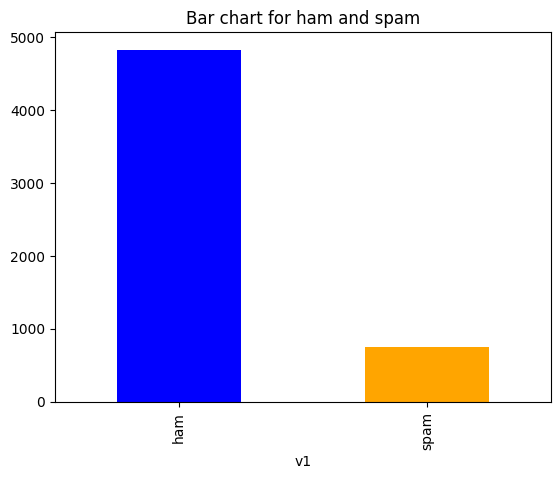

In [29]:
count_Class=pd.value_counts(data["v1"], sort= True)
print(count_Class)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart for ham and spam')
plt.show()

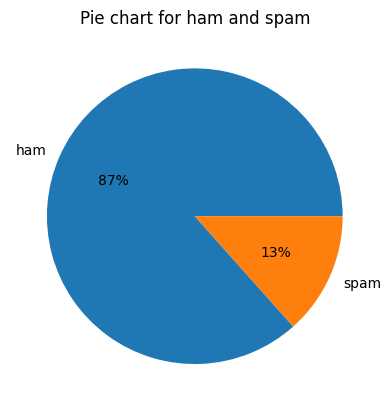

In [30]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart for ham and spam')
plt.ylabel('')
plt.show()

## Data Analytics

We want to find the frequencies of words in the spam and non-spam messages. The words of the messages will be model features.<p>
We use the function Counter.

In [31]:
# list all ham messages
ham_messages=data[data['v1']=='ham']["v2"]
ham_messages.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: v2, dtype: object

In [32]:
# Join all ham messages for counting
ham_words = " ".join(ham_messages).split()
ham_words[:10]

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n']

In [33]:
#Number of vocabularies in ham_words
len(ham_words)

68518

## Analyze the rate of occurrence of words in Ham/Spam emails

In [34]:
from collections import Counter
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
df1

,words in non-spam,count
0,to,1530
1,you,1458
2,I,1436
3,the,1019
4,a,969
5,and,738
6,i,736
7,in,734
8,u,645
9,is,638


In [35]:
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})
df2

,words in spam,count_
0,to,604
1,a,358
2,your,187
3,call,185
4,or,185
5,the,178
6,2,169
7,for,169
8,you,164
9,is,143


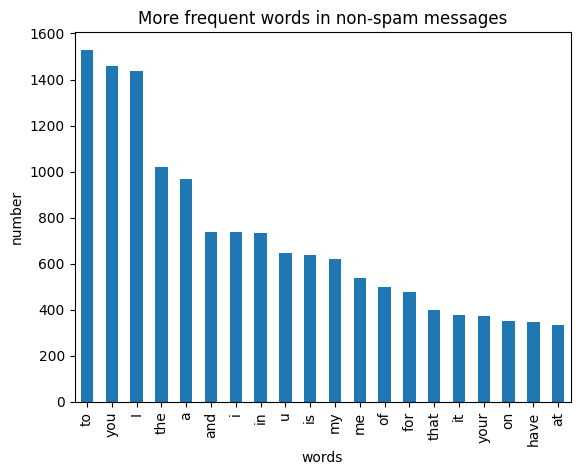

In [36]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

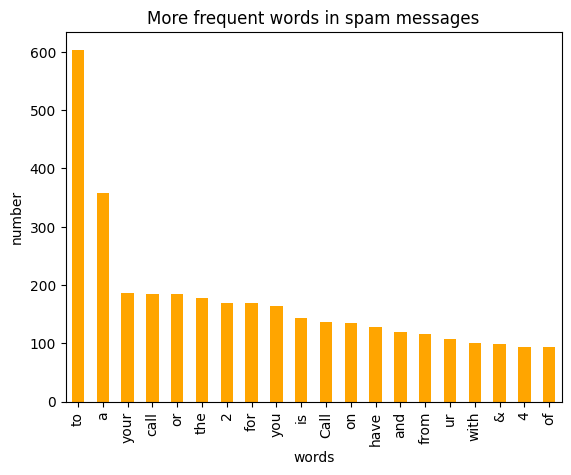

In [37]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

We can see that the majority of frequent words in both classes are stop words such as 'to', 'a', 'or' and so on. <p>
With stop words we refer to the most common words in a lenguage, there is no simgle, universal list of stop words. <p>

## Feature Engineering

Text preprocessing, tokenizing and filtering of stopwords are included in a high level component that is able to build a dictionary of features and transform documents to feature vectors.<p>
**We remove the stop words in order to improve the analytics**

In [38]:
data["v2"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [39]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)

(5572, 8404)

In [ ]:
X.shape

In [ ]:
X.toarray()

In [ ]:
#xem một số kí tự
X.toarray()[X.toarray()[:,0] !=0]

We have created more than 8400 new features. The new feature $j$ in the row $i$ is equal to 1 if the word $w_{j}$ appears in the text example $i$. It is zero if not.

## Predictive Analysis

First we transform the variable spam/non-spam into binary variable, then we split our data set in training set and test set.

In [ ]:
data.head()

In [40]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})

In [ ]:
data["v1"].head()

In [41]:
#split training/test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=42)

X_train = X_train.toarray()
X_test = X_test.toarray()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print([np.shape(X_train), np.shape(X_test)])

[(3733, 8404), (1839, 8404)]


### Multinomial naive bayes classifier

We train different bayes models changing the regularization parameter $\alpha$. <p>
    - Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
We evaluate the accuracy, recall and precision of the model with the test set.

In [42]:
import numpy as np
np.set_printoptions(precision=6)

class MultinomialNB(object):
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        count_sample = X.shape[0]
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        self.class_log_prior_ = [np.log(len(i) / count_sample) for i in separated]
        count = np.array([np.array(i).sum(axis=0) for i in separated]) + self.alpha
        self.feature_log_prob_ = np.log(count / count.sum(axis=1)[np.newaxis].T)
        return self

    def predict_log_proba(self, X):
        return [(self.feature_log_prob_ * x).sum(axis=1) + self.class_log_prior_
                for x in X]

    def predict(self, X):
        return np.argmax(self.predict_log_proba(X), axis=1)

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

def accuracy_score(actual, predicted):
    correct = 0
    for i in range(len(actual)):
      if actual[i] == predicted[i]:
        correct += 1
    return correct / float(len(actual)) * 100.0

In [43]:
# Select alpha
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1

In [44]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns =
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,99.866059,97.444263,0.920635,0.895753
1,0.11001,99.785695,97.607395,0.936508,0.893939
2,0.22001,99.785695,97.716150,0.936508,0.900763
3,0.33001,99.758907,97.716150,0.936508,0.900763
4,0.44001,99.705331,97.716150,0.936508,0.900763
5,0.55001,99.624967,97.661773,0.936508,0.897338
6,0.66001,99.651755,97.607395,0.932540,0.896947
7,0.77001,99.651755,97.607395,0.924603,0.903101
8,0.88001,99.624967,97.607395,0.924603,0.903101
9,0.99001,99.598178,97.607395,0.920635,0.906250


I select the model with the most test precision

In [ ]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

**My best model does not produce any false positive, which is our goal.** <p>
Let's see if there is more than one model with 100% precision !

In [ ]:
models[models['Test Precision']==1].head(n=5)

Between these models with the highest possible precision, we are going to select which has more test accuracy.

In [ ]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

#### Confusion matrix with naive bayes classifier

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

Comment:
- Precision = 1 : => false positive = 0
- Recall: 77.7%, missed 33% of spam emails

## Conclusion

- We misclassify 56 spam messages as non-spam emails whereas we don't misclassify any non-spam message.